<a href="https://colab.research.google.com/github/arssite/Datalysis/blob/main/VGG16_DogVsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VGG-16 | CNN model**
ImageNet Large Scale Visual Recognition Challenge (ILSVRC) is an annual computer vision competition. Each year, teams compete on two tasks. The first is to detect objects within an image coming from 200 classes, which is called object localization. The second is to classify images, each labeled with one of 1000 categories, which is called image classification. VGG 16 was proposed by Karen Simonyan and Andrew Zisserman of the Visual Geometry Group Lab of Oxford University in 2014 in the paper “VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION”. This model won 1st  and 2nd place in the above categories in the 2014 ILSVRC challenge.

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 22.9MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.6MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [6]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False, # remove the dense
    input_shape = (150,150,3) # reshaping
)

58889256/58889256 [==============================] - 3s 0us/step


In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [8]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
conv_base.trainable = False

In [11]:
# Use when we are not doing data augmentation
train_ds = keras.utils.image_dataset_from_directory(
directory = '/content/train',
                                                     labels='inferred',
                                                     label_mode='int',
                                                     batch_size=32,

     image_size = (150,150)
 )
validation_ds = keras.utils.image_dataset_from_directory(
     directory = '/content/test',
     labels='inferred',
                                                     label_mode='int',
                                                     batch_size=32,
     image_size = (150,150)

     )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
def process(image,label):
     image = tensorflow.cast(image/255.,tensorflow.float32)
     return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 100ms/step - loss: 0.2684 - accuracy: 0.8856 - val_loss: 0.2258 - val_accuracy: 0.9026
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1929 - accuracy: 0.9197 - val_loss: 0.1991 - val_accuracy: 0.9154
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1617 - accuracy: 0.9338 - val_loss: 0.2035 - val_accuracy: 0.9152
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1332 - accuracy: 0.9456 - val_loss: 0.2183 - val_accuracy: 0.9086
Epoch 5/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1037 - accuracy: 0.9578 - val_loss: 0.2191 - val_accuracy: 0.9158
Epoch 6/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0855 - accuracy: 0.9681 - val_loss: 0.2603 - val_accuracy: 0.9064
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0661 - accuracy: 0.9737 - val_loss: 0.3189 - val_accu

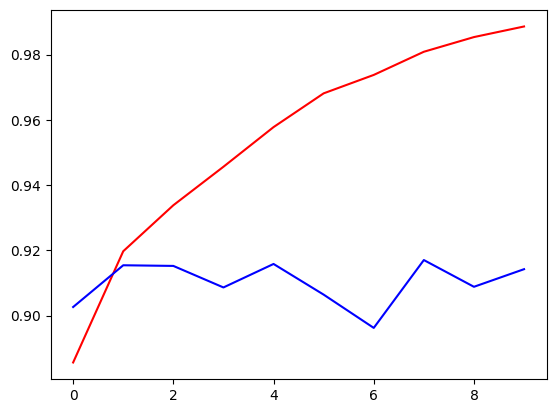

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')

In [17]:
print('accuracy: ',history.history['accuracy'][9])
print('val_accuracy: ',history.history['val_accuracy'][9])

accuracy:  0.9886000156402588
val_accuracy:  0.9142000079154968


In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
import matplotlib.pyplot as plt
import cv2
import cv2 as cv
import numpy as np
import argparse
import time
import cv2

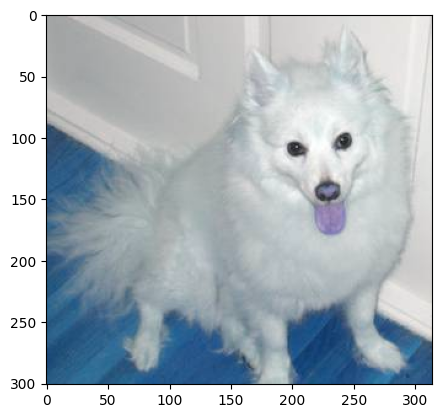

In [26]:
import cv2 as cv
from matplotlib import pyplot as plt



img = cv.imread('/content/dog.187.jpg')
#cv.rectangle(img,(29,2496),(604,2992),(255,0,0),5)
plt.imshow(img)

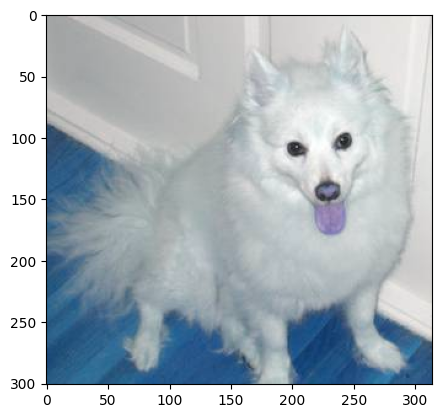

In [27]:
plt.imshow(img)

In [22]:
test_img = cv2.imread('/content/dog.187.jpg')

array([[[165, 167, 167],
        [165, 167, 167],
        [164, 166, 166],
        ...,
        [237, 235, 234],
        [229, 227, 226],
        [209, 207, 206]],

       [[165, 167, 167],
        [165, 167, 167],
        [164, 166, 166],
        ...,
        [236, 234, 233],
        [228, 226, 225],
        [209, 207, 206]],

       [[165, 167, 167],
        [165, 167, 167],
        [164, 166, 166],
        ...,
        [236, 234, 233],
        [226, 224, 223],
        [207, 205, 204]],

       ...,

       [[ 34,  85, 125],
        [ 35,  86, 126],
        [ 38,  89, 129],
        ...,
        [ 40,  82, 129],
        [ 40,  84, 131],
        [ 40,  84, 131]],

       [[ 33,  84, 124],
        [ 35,  86, 126],
        [ 39,  90, 130],
        ...,
        [ 39,  83, 130],
        [ 41,  85, 132],
        [ 41,  85, 132]],

       [[ 35,  86, 126],
        [ 37,  88, 128],
        [ 41,  92, 132],
        ...,
        [ 39,  82, 131],
        [ 42,  85, 134],
        [ 40,  86, 134]]], dtype=uint8)
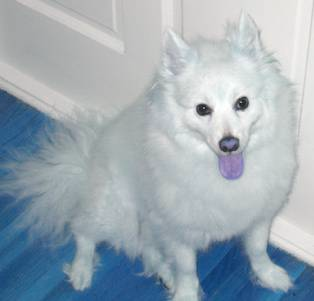

In [23]:
test_img

In [33]:
img = cv2.resize(img,(150,150))

In [29]:
test_input = img.reshape((1,150,150,3))

In [30]:
model.predict(test_input)

1/1 [==============================] - 1s 1s/step


array([[1.]], dtype=float32)

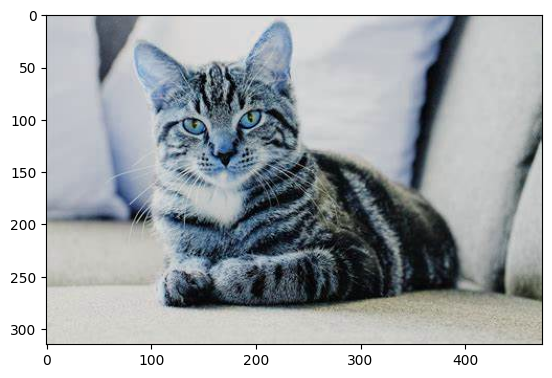

In [37]:
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/cat2.jfif')
#cv.rectangle(img,(29,2496),(604,2992),(255,0,0),5)
plt.imshow(img)


In [38]:
img = cv2.resize(img,(150,150))

In [39]:
test_input2 = img.reshape((1,150,150,3))

In [40]:
model.predict(test_input2)

1/1 [==============================] - 0s 87ms/step


array([[0.]], dtype=float32)